In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

# ENCODAGE

In [22]:
# ENCODAGE
X = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [23]:
transformer = LabelEncoder()
transformer .fit(X)

LabelEncoder()

In [24]:
transformer.transform(X)

array([0, 1, 0, 2])

In [25]:
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

In [26]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [27]:
encoder = LabelEncoder()
a = encoder.fit_transform(y)

In [28]:
encoder.inverse_transform(a)

array(['chat', 'chien', 'chat', 'oiseau'], dtype='<U6')

In [29]:
X = np.array([['chat', 'poils'],
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

In [30]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [31]:
# one hot encodage binaire
y = np.array(['chat', 'chien', 'chat', 'oiseau'])
encoder = LabelBinarizer(sparse_output=True) # pour une liste
encoder.fit_transform(y)
# matrice creuse ( sparce matrix) peu lourd car 0 non comptés

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [32]:
encoder = OneHotEncoder() # pour plusieurs listes
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [33]:
# resumé
# encodage ordinal = LabelEncoder / OrdinalEncoder
# encodage one-hot = LabelBinarizer / OneHotEncoder

# NORMALISATION

In [34]:
# NORMALISATION
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()
X = np.array([[70],[80],[120]])

In [35]:
# definition de l'échelle de base de la normalisation
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [36]:
# ajout d'une valeur remise à l'échelle précédemment initialisée
X_test = np.array([[90],[10]])
scaler.transform(X_test)

array([[ 0.4],
       [-1.2]])

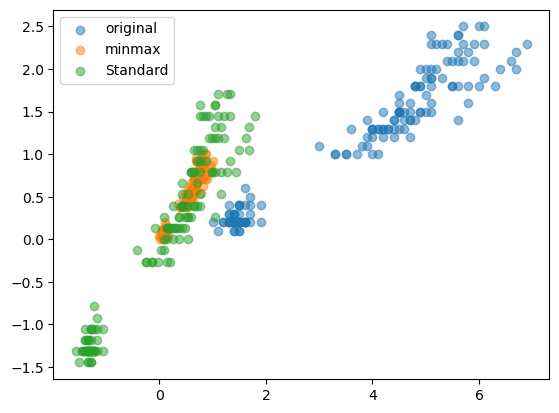

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)
X_standard = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3],label='original',alpha=0.5)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3],label='minmax',alpha=0.5)
plt.scatter(X_standard[:, 2], X_standard[:, 3],label='Standard',alpha=0.5)
plt.legend()
plt.show()

In [38]:
# Standartisation
from sklearn.preprocessing import StandardScaler

In [39]:
X = np.array([[70],[80],[120]])

In [40]:
scaler = StandardScaler()
scaler.fit_transform(X)
# 1,38 - 0.92 - 0.46 = 0

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

In [41]:
# StandardScaler + MinMaxScaler pas bien si -> outliers = valeurs abérrantes

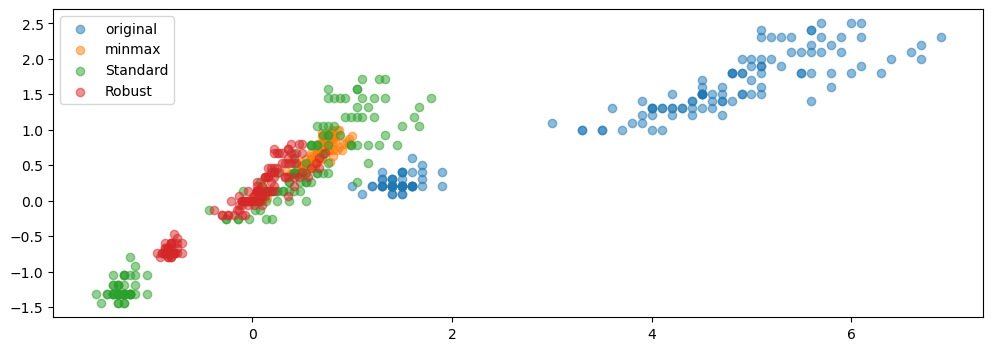

In [42]:
# RobustionScaler
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

outliers = np.full((10,4),100)+np.random.randn(10,4)
np.vstack((X,outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_standard = StandardScaler().fit_transform(X)
X_Robust = RobustScaler().fit_transform(X)

plt.figure(figsize=(12,4))
plt.scatter(X[:, 2], X[:, 3],label='original',alpha=0.5)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3],label='minmax',alpha=0.5)
plt.scatter(X_standard[:, 2], X_standard[:, 3],label='Standard',alpha=0.5)
plt.scatter(X_Robust[:, 2], X_Robust[:, 3],label='Robust',alpha=0.5)
plt.legend()
plt.show()

# POLYNOMIAL_FEATURES

In [43]:
# POLYNOMIAL_FEATURES -> features engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [44]:
X = np.array([[1],
       [2],
       [0.5]])

In [45]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

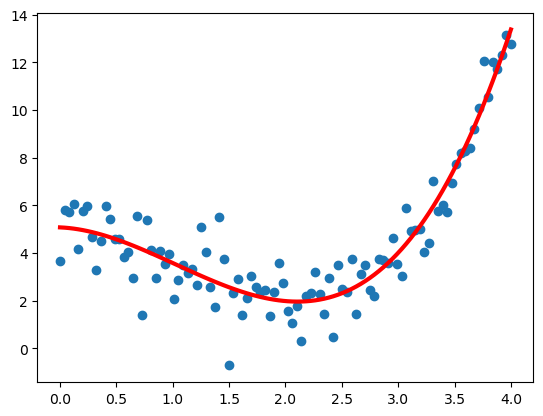

In [46]:
m = 100
X = np.linspace(0, 4, m).reshape((m, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(m, 1)

X_poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)
# Normaliser apres PolynomialFeatures

# TRANSFORMATION NON LINEAIRE

In [47]:
# TRANSFORMATION NON LINEAIRE
from sklearn.preprocessing import PowerTransformer

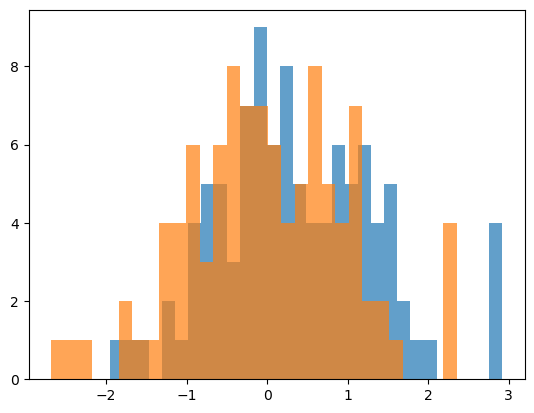

In [48]:
np.random.seed(0)
X = np.random.rand(100,2)+np.random.randn(100,2)
X2 = PowerTransformer().fit_transform(X)

plt.hist(X[:,0],bins=30, alpha=0.7, label='original')
plt.hist(X2[:,0],bins=30, alpha=0.7, label='powertransformer')
plt.show()

# DISCRETISATION

In [49]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [50]:
X = np.linspace(0, 5, 10).reshape((10, 1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

In [51]:
np.hstack((X, Binarizer(threshold=3).fit_transform(X))) # recouper en 2 catégories

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [52]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray() # recouper en plus de 2 catégories

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

# PIPELINE

In [53]:
# PIPELINE
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [54]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [55]:
# Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed,y_train)

# Test
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [56]:
model = make_pipeline(StandardScaler(),SGDClassifier())
model.fit(X_train,y_train)
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
model = make_pipeline(PolynomialFeatures(),StandardScaler(),SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}
grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)
     

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [59]:
grid.best_score_

0.9732142857142858

In [60]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model = make_pipeline(PolynomialFeatures(),MinMaxScaler(),KNeighborsClassifier())


In [62]:
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'kneighborsclassifier__n_neighbors':[1,2,3,4,5,6]
}
grid = GridSearchCV(model,param_grid=params,cv=4)
grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5,
                                                               6],
                         'polynomialfeatures__degree': [2, 3, 4]})

In [63]:
grid.best_params_

{'kneighborsclassifier__n_neighbors': 4, 'polynomialfeatures__degree': 3}

In [64]:
grid.best_score_

0.9732142857142857